In [78]:
import pandas as pd
import numpy as np

In [79]:
cols = ['word_freq_make','word_freq_address', 'word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
         'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will',
         'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
         'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
         'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
         'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
         'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu',
         'word_freq_table','word_freq_conference','char_freq_; ','char_freq_( ','char_freq_[','char_freq_!','char_freq_$','char_freq_#',
        'capital_run_length_average','capital_run_length_longest','capital_run_length_total', 'spam']
df = pd.read_csv('spambase.data', names=cols)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features = df.loc[:,df.columns != 'spam']
target = df.loc[:, 'spam']
# Split into training/testing
# The following will split as 75% training 25% testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=3000)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [81]:
# format a number based on its magnitude
# If <= 100000, print using :.3f
# Else print using :.0e
def format_nbr(f):
    if abs(f) < 100000:
        return f'{f:.3f}'
    else:
        return f'{f:.4e}'

In [82]:
#1a train logistic regression model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_test_predicted = log_model.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix

#1a conf matrix
conf_matrix = confusion_matrix(y_test, y_test_predicted)
print(f'   confusion matrix =\n {conf_matrix}')

   confusion matrix =
 [[663  39]
 [ 42 407]]


In [84]:
#1a tn, fp, fn, tp
tn, fp, fn, tp = conf_matrix.ravel() 
print (f'true positives =  {tp},\nfalse positives = {fp},\ntrue negatives = {tn},\nfalse negatives = {fn}')

true positives =  407,
false positives = 39,
true negatives = 663,
false negatives = 42


In [85]:
from sklearn.metrics import accuracy_score

#1a acc/error 
acc = accuracy_score(y_test, y_test_predicted)
err = 1-acc
print(f'   accuracy = {format_nbr(acc)}')
print(f'   error = {format_nbr(err)}')

   accuracy = 0.930
   error = 0.070


In [86]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#1a prec, recall, f1
prec= precision_score(y_test, y_test_predicted)
recall = recall_score(y_test, y_test_predicted)
f1 = f1_score(y_test, y_test_predicted)
print(f'   precision = {format_nbr(prec)}')
print(f'   recall = {format_nbr(recall)}')
print(f'   f1 = {format_nbr(f1)}')

   precision = 0.913
   recall = 0.906
   f1 = 0.909


In [87]:
#1b print coeffs 
# Make a dataframe with first column naming features and 2nd column the coefficient for that feature
d = {'feature': cols[:-1], 'Coef': log_model.coef_[0]}
df_coef = pd.DataFrame(data = d)
# Sort the coefficient dataframe to see which are largest (both positive and negative)
df_coef_sorted = df_coef.sort_values('Coef', ascending=False)
print(df_coef_sorted)

                       feature      Coef
55  capital_run_length_longest  1.267732
52                 char_freq_$  1.207775
6             word_freq_remove  0.895562
22               word_freq_000  0.894307
3                 word_freq_3d  0.864112
53                 char_freq_#  0.858514
15              word_freq_free  0.821593
19            word_freq_credit  0.569852
56    capital_run_length_total  0.443533
4                word_freq_our  0.396171
16          word_freq_business  0.386323
23             word_freq_money  0.361201
35        word_freq_technology  0.290619
51                 char_freq_!  0.248957
27               word_freq_650  0.238475
20              word_freq_your  0.237265
21              word_freq_font  0.227725
5               word_freq_over  0.191943
7           word_freq_internet  0.191727
8              word_freq_order  0.178446
31               word_freq_857  0.162189
18               word_freq_you  0.161183
14         word_freq_addresses  0.132030
17             w

In [88]:
#1c
probs = log_model.predict_proba(X_test)
col_t = []
col_acc = []
col_prec = []
col_recall = []
for t in [0.25, 0.5, 0.75, 0.9]:
    y_pred_t = np.where(probs[:, 1] >= t, 1, 0)
    accuracy = accuracy_score(y_test, y_pred_t)
    prec= precision_score(y_test, y_pred_t)
    recall = recall_score(y_test, y_pred_t)
    col_t.append(t)
    col_acc.append(accuracy)
    col_prec.append(prec)
    col_recall.append(recall)
    
d = {'T': col_t, 'Accuracy': col_acc, 'Precision': col_prec, 'Recall:' : col_recall}
metrics_df = pd.DataFrame(d)
metrics_df

,T,Accuracy,Precision,Recall:
0,0.25,0.898349,0.810861,0.964365
1,0.50,0.929626,0.912556,0.906459
2,0.75,0.903562,0.947090,0.797327
3,0.90,0.847958,0.962838,0.634744


In [89]:
#2 gradient descent
from numpy.linalg import norm
class LogisticRegressionGD:
    def __init__(self, alpha, epsilon = .01, max_iter=1000):
        self.alpha = alpha
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.theta_ = []
    
    def h_theta(self, X, theta):
        z = X @ theta
        # Protect against exp(-z) blowing up and causing a warning
        z = np.maximum(-1.0E2, z)
        h = 1 / (1 + np.exp(-z))
        return h
    
    def predict_proba(self, X):
        X_arr = np.insert(X.to_numpy(), 0, 1, axis=1)
        h = self.h_theta(X_arr, self.theta_)
        probs = np.zeros(shape=(X_arr.shape[0], 2))
        probs[:, 1] = h
        probs[:, 0] = 1 - h
        return probs


    # fits the model to the training data
    def fit(self, X, y):
        X_arr = np.insert(X.to_numpy(), 0, 1, axis=1)
        # Initialize random theta
        self.theta_ = np.random.rand(X_arr.shape[1])
       
        for i in range(0, self.max_iter):
            h = self.h_theta(X_arr, self.theta_)
            theta_new = self.theta_ - self.alpha * (h - y).transpose() @ X_arr
            delta = np.linalg.norm(theta_new - self.theta_)
            self.theta_ = theta_new
            if delta < self.epsilon:
                break
        # Save instance variables used by run_model method
        self.coef_ = self.theta_[1:]
        self.intercept_ = self.theta_[0]

    # Predict Y values given X values using model fit
    def predict(self, X):
        X2 = np.insert(X.to_numpy(), 0, 1, axis=1)
        probs = self.h_theta(X2, self.theta_)
        result = np.where(probs >= 0.5, 1, 0)
        return result

In [90]:
from sklearn.metrics import log_loss

#2
lr_col = []
iter_col = []
loss_col = []
for alpha in [.0001, .001, .01]:
    for max_iter in [10, 50, 100]:
        model = LogisticRegressionGD(alpha = alpha, max_iter = max_iter)
        model.fit(X_train, y_train)
        lr_col.append(alpha)
        iter_col.append(max_iter)
        loss_col.append(log_loss(y_test, model.predict_proba(X_test)))
        
d = {'Learning Rate': lr_col, 'Iterations': iter_col, 'Loss': loss_col}
pd.DataFrame(d)

,Learning Rate,Iterations,Loss
0,0.0001,10,0.659877
1,0.0001,50,0.333567
2,0.0001,100,0.278461
3,0.0010,10,0.270622
4,0.0010,50,0.232155
5,0.0010,100,0.219350
6,0.0100,10,0.621410
7,0.0100,50,0.469668
8,0.0100,100,0.453488


In [91]:
#2
# Report metrics after 100 iterations with varying learning rates

col_alpha = []
col_acc = []
col_prec = []
col_recall = []
col_f1 = []
for alpha in [.0001, .001, .005, .01]:
    model = LogisticRegressionGD(alpha = alpha, max_iter = 100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    col_alpha.append(alpha)
    col_acc.append(accuracy)
    col_prec.append(precision)
    col_recall.append(recall)
    col_f1.append(f1)
    
d = {'alpha': col_alpha, 'Accuracy': col_acc, 'Precision': col_prec, 'Recall:' : col_recall, 'F1': col_f1}
metrics_df = pd.DataFrame(d)
metrics_df

,alpha,Accuracy,Precision,Recall:,F1
0,0.0001,0.920938,0.908676,0.886414,0.897407
1,0.0010,0.927889,0.915909,0.897550,0.906637
2,0.0050,0.905300,0.927136,0.821826,0.871311
3,0.0100,0.874023,0.924581,0.737194,0.820322


In [92]:
#3a
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

lda_model = LinearDiscriminantAnalysis()

k_vals = [3,5,7,9,11,15]
grid_parameters = { 'n_neighbors': k_vals}  # which parameters should be tested
gridsearch_cv = GridSearchCV(KNeighborsClassifier(), grid_parameters, scoring=['accuracy', 'precision', 'recall'], refit='accuracy', cv=5)
gridsearch_cv.fit(X_train, y_train)
print(gridsearch_cv.best_params_)  # This tells you the best parameter choice
# Create data for making a DataFrame for displaying results
d = {'k': k_vals,
     'accuracy': gridsearch_cv.cv_results_['mean_test_accuracy'],
     'error': 1-gridsearch_cv.cv_results_['mean_test_accuracy'],
     'precision': gridsearch_cv.cv_results_['mean_test_precision'],
     'recall': gridsearch_cv.cv_results_['mean_test_recall']}
pd.DataFrame(d)

{'n_neighbors': 5}


,k,accuracy,error,precision,recall
0,3,0.901449,0.098551,0.878587,0.871698
1,5,0.905217,0.094783,0.888749,0.869479
2,7,0.902899,0.097101,0.889114,0.862896
3,9,0.904348,0.095652,0.896071,0.858484
4,11,0.900870,0.099130,0.895463,0.848963
5,15,0.896522,0.103478,0.900072,0.830632


In [93]:
#3b
model_col = []
data_col = []
acc_col = []
prec_col = []
recall_col = []
estimators = {'kNN' : KNeighborsClassifier(n_neighbors=5),
              'Logistic Regression': LogisticRegression(),
             'LDA': LinearDiscriminantAnalysis() }
for name, model in estimators.items():
    model.fit(X_train, y_train)
    for (data_name, data_x, data_y) in [('Training', X_train, y_train), ('Testing', X_test, y_test)]:
        y_pred = model.predict(data_x)
        accuracy = accuracy_score(data_y, y_pred)
        precision = precision_score(data_y, y_pred)
        recall = recall_score(data_y, y_pred)
        f1 = f1_score(data_y, y_pred)
        model_col.append(name)
        data_col.append(data_name)
        acc_col.append(accuracy)
        prec_col.append(precision)
        recall_col.append(recall)
        
d = {'Model': model_col, 'Data': data_col, 'Accuracy': acc_col, 'Precision': prec_col, 'Recall': recall_col}
pd.DataFrame(d)

,Model,Data,Accuracy,Precision,Recall
0,kNN,Training,0.932174,0.918519,0.909091
1,kNN,Testing,0.896612,0.875000,0.857461
2,Logistic Regression,Training,0.928116,0.928571,0.886364
3,Logistic Regression,Testing,0.929626,0.912556,0.906459
4,LDA,Training,0.885507,0.918755,0.779326
5,LDA,Testing,0.892268,0.915601,0.797327


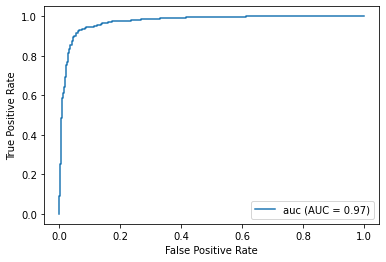

In [94]:
#3c
from sklearn import metrics
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

probs = log_model.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='auc')
display.plot()
plt.show()

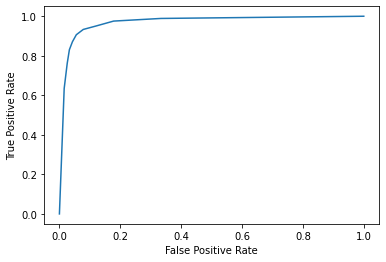

In [95]:
#3d
from sklearn.metrics import recall_score
fprs = []
tprs = []

model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
probs = model.predict_proba(X_test)
for t in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    y_pred_t = np.where(probs[:, 1] >= t, 1, 0)
    tpr = recall_score(y_test, y_pred_t)
    fpr = 1 - recall_score(y_test, y_pred_t, pos_label = 0)
    fprs.append(fpr)
    tprs.append(tpr)
plt.plot(fprs, tprs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [96]:
from sklearn.model_selection import KFold


#4a
def kfold_cv(X_data, y_data, model, splits):
    errors = []
    kf = KFold(n_splits=splits)
    kf.get_n_splits(X_data)
    for train_index, test_index in kf.split(X_data):
        x_train_kf = X_train.iloc[train_index]
        x_test_kf = X_train.iloc[test_index]
        y_train_kf = y_train.iloc[train_index]
        y_test_kf = y_train.iloc[test_index]
        model.fit(x_train_kf, y_train_kf)
        y_pred_kf = model.predict(x_test_kf)
        acc = accuracy_score(y_test_kf, y_pred_kf)
        err = 1 - acc
        errors.append(err)
    result = {'avg_err': np.mean(errors), 'error': errors}
    print(f'average error: {np.mean(errors)}')
    return result

In [97]:
#4b
k_col = []
err_col = []
model_col = []
estimators = {'Logistic Regression': LogisticRegression(),
             'LDA': LinearDiscriminantAnalysis() }
for name, model in estimators.items():
    for k in [5, 10]:
        result = kfold_cv(X_train, y_train, model, k)
        avg_err = result['avg_err']
        k_col.append(k)
        err_col.append(avg_err)
        model_col.append(name)
        errors = result['error']

d = {'Model': model_col, 'k': k_col, 'Avg Validation Error': err_col}
pd.DataFrame(d)

average error: 0.07971014492753623
average error: 0.07681159420289857
average error: 0.11391304347826085
average error: 0.11391304347826085


,Model,k,Avg Validation Error
0,Logistic Regression,5,0.079710
1,Logistic Regression,10,0.076812
2,LDA,5,0.113913
3,LDA,10,0.113913
